In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./company_data.csv')

In [3]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0      company  employee_turnover  revenue_growth  \
0             0    Company_1               90.2            10.0   
1             1    Company_2               16.6            28.0   
2             2    Company_3               27.3            38.4   
3             3    Company_4              119.0            62.3   
4             4    Company_5               10.3            45.5   
..          ...          ...                ...             ...   
162         162  Company_163               29.2            46.6   
163         163  Company_164               17.1            28.5   
164         164  Company_165               23.3            72.0   
165         165  Company_166               56.3            30.0   
166         166  Company_167               83.1            37.0   

     rd_investment  operational_cost  average_salary  market_volatility  \
0             7.58              44.9            1610               9.44   
1          

In [4]:
df.count

<bound method DataFrame.count of      Unnamed: 0      company  employee_turnover  revenue_growth  \
0             0    Company_1               90.2            10.0   
1             1    Company_2               16.6            28.0   
2             2    Company_3               27.3            38.4   
3             3    Company_4              119.0            62.3   
4             4    Company_5               10.3            45.5   
..          ...          ...                ...             ...   
162         162  Company_163               29.2            46.6   
163         163  Company_164               17.1            28.5   
164         164  Company_165               23.3            72.0   
165         165  Company_166               56.3            30.0   
166         166  Company_167               83.1            37.0   

     rd_investment  operational_cost  average_salary  market_volatility  \
0             7.58              44.9            1610               9.44   
1           

In [5]:
df.isnull().sum()

Unnamed: 0           0
company              0
employee_turnover    0
revenue_growth       0
rd_investment        0
operational_cost     0
average_salary       0
market_volatility    0
average_tenure       0
growth_potential     0
net_profit           0
dtype: int64

In [6]:
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [7]:
df.head()

,index,company,employee_turnover,revenue_growth,rd_investment,operational_cost,average_salary,market_volatility,average_tenure,growth_potential,net_profit
0,0,Company_1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Company_2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Company_3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Company_4,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Company_5,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

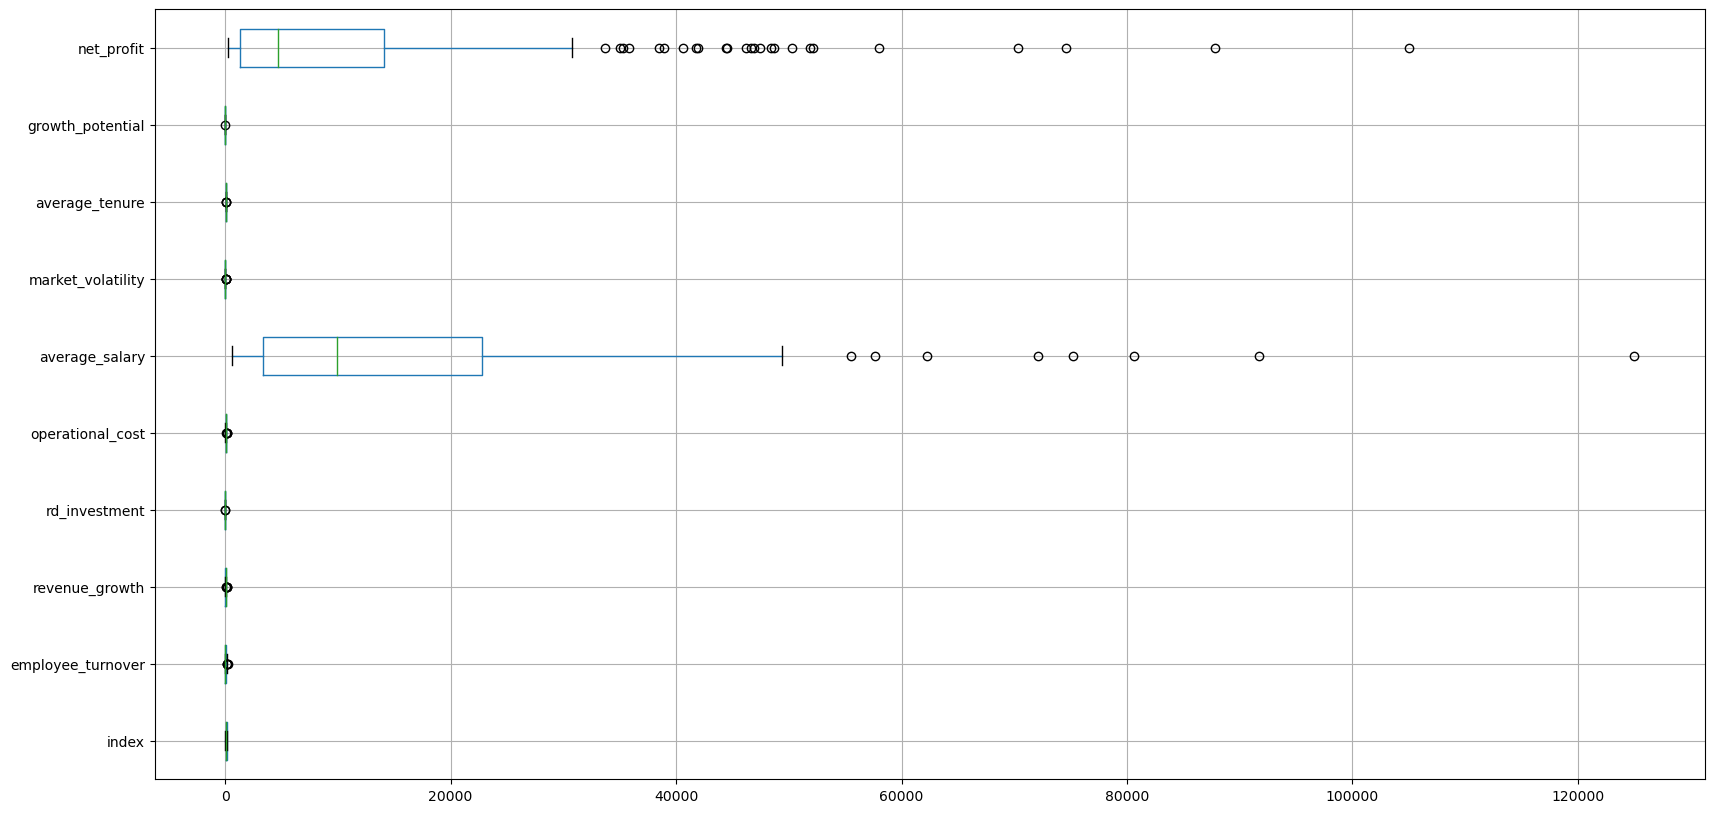

In [8]:
plt.figure(figsize=(20,10))
df.boxplot(vert=False)

In [9]:
df.isnull().sum()

index                0
company              0
employee_turnover    0
revenue_growth       0
rd_investment        0
operational_cost     0
average_salary       0
market_volatility    0
average_tenure       0
growth_potential     0
net_profit           0
dtype: int64

In [10]:
# Menghitung upper bound dan lower bound untuk net_profit
upper_bound_net_profit = df['net_profit'].quantile(0.75) + 1.5 * (df['net_profit'].quantile(0.75) - df['net_profit'].quantile(0.25))
lower_bound_net_profit = df['net_profit'].quantile(0.25) - 1.5 * (df['net_profit'].quantile(0.75) - df['net_profit'].quantile(0.25))

# Mengganti nilai outliers dengan median
df['net_profit'] = np.where((df['net_profit'] < lower_bound_net_profit) | (df['net_profit'] > upper_bound_net_profit), df['net_profit'].median(), df['net_profit'])

# Menghitung upper bound dan lower bound untuk average_salary
upper_bound_salary = df['average_salary'].quantile(0.75) + 1.5 * (df['average_salary'].quantile(0.75) - df['average_salary'].quantile(0.25))
lower_bound_salary = df['average_salary'].quantile(0.25) - 1.5 * (df['average_salary'].quantile(0.75) - df['average_salary'].quantile(0.25))

# Mengganti nilai outliers dengan median
df['average_salary'] = np.where((df['average_salary'] < lower_bound_salary) | (df['average_salary'] > upper_bound_salary), df['average_salary'].median(), df['average_salary'])

In [11]:
print(df['average_salary'].mode(), "\n", df['net_profit'].mode())

0    9960.0
Name: average_salary, dtype: float64 
 0    4660.0
Name: net_profit, dtype: float64


In [12]:
df.isnull().sum()

index                0
company              0
employee_turnover    0
revenue_growth       0
rd_investment        0
operational_cost     0
average_salary       0
market_volatility    0
average_tenure       0
growth_potential     0
net_profit           0
dtype: int64

In [13]:
def separate_name(df):
    df[['company', 'company_id']] = df['company'].str.split('_', expand=True)
    df.drop(columns=['company'], inplace=True)
    
    return df

separate_name(df)

,index,employee_turnover,revenue_growth,rd_investment,operational_cost,average_salary,market_volatility,average_tenure,growth_potential,net_profit,company_id
0,0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,3
3,3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,4
4,4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,5
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,163
163,163,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,164
164,164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,165
165,165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,166


In [14]:
df.isnull().sum()

index                0
employee_turnover    0
revenue_growth       0
rd_investment        0
operational_cost     0
average_salary       0
market_volatility    0
average_tenure       0
growth_potential     0
net_profit           0
company_id           0
dtype: int64

In [15]:
def mean_fill(df, columns):
    for col in columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# Contoh penggunaan
cols = ['average_salary', 'net_profit']
mean_fill(df, cols)

In [16]:
df.dtypes

index                  int64
employee_turnover    float64
revenue_growth       float64
rd_investment        float64
operational_cost     float64
average_salary       float64
market_volatility    float64
average_tenure       float64
growth_potential     float64
net_profit           float64
company_id            object
dtype: object

In [17]:
df.isnull().sum()

index                0
employee_turnover    0
revenue_growth       0
rd_investment        0
operational_cost     0
average_salary       0
market_volatility    0
average_tenure       0
growth_potential     0
net_profit           0
company_id           0
dtype: int64

In [18]:
pd.to_numeric(df['company_id'])

0        1
1        2
2        3
3        4
4        5
      ... 
162    163
163    164
164    165
165    166
166    167
Name: company_id, Length: 167, dtype: int64

In [19]:
df.dtypes

index                  int64
employee_turnover    float64
revenue_growth       float64
rd_investment        float64
operational_cost     float64
average_salary       float64
market_volatility    float64
average_tenure       float64
growth_potential     float64
net_profit           float64
company_id            object
dtype: object

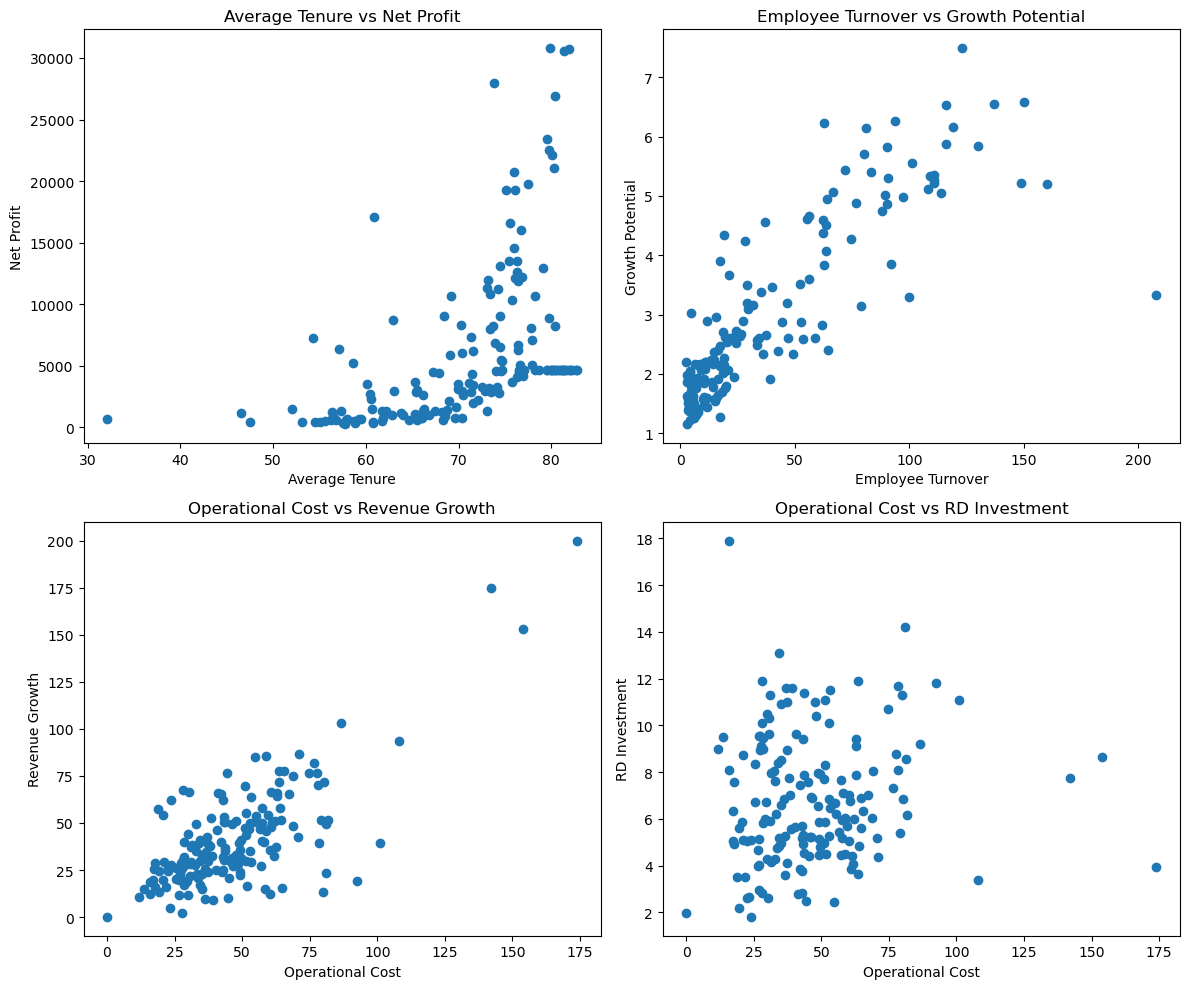

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatterplot 1: Average Tenure vs Net Profit
axs[0, 0].scatter(df['average_tenure'], df['net_profit'])
axs[0, 0].set_xlabel('Average Tenure')
axs[0, 0].set_ylabel('Net Profit')
axs[0, 0].set_title('Average Tenure vs Net Profit')

# Scatterplot 2: Employee Turnover vs Growth Potential
axs[0, 1].scatter(df['employee_turnover'], df['growth_potential'])
axs[0, 1].set_xlabel('Employee Turnover')
axs[0, 1].set_ylabel('Growth Potential')
axs[0, 1].set_title('Employee Turnover vs Growth Potential')

# Scatterplot 3: Operational Cost vs Revenue Growth
axs[1, 0].scatter(df['operational_cost'], df['revenue_growth'])
axs[1, 0].set_xlabel('Operational Cost')
axs[1, 0].set_ylabel('Revenue Growth')
axs[1, 0].set_title('Operational Cost vs Revenue Growth')

# Scatterplot 4: Operational Cost vs RD Investment
axs[1, 1].scatter(df['operational_cost'], df['rd_investment'])
axs[1, 1].set_xlabel('Operational Cost')
axs[1, 1].set_ylabel('RD Investment')
axs[1, 1].set_title('Operational Cost vs RD Investment')

plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

C:\Users\50272\AppData\Local\Temp\ipykernel_18200\1886496741.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.drop(columns=['index']).corr(method='pearson')


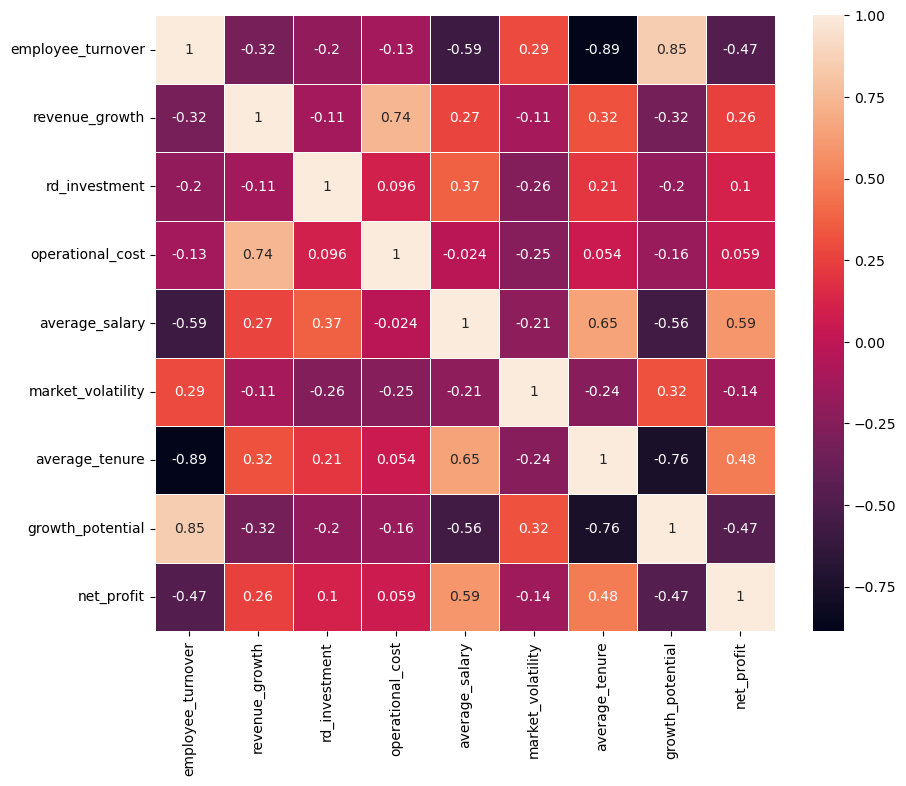

In [22]:
correlation = df.drop(columns=['index']).corr(method='pearson')

plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, linewidths=0.5)

plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')

X = df[['growth_potential', 'employee_turnover', 'average_tenure']]

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 33.40865004499987
2 : 15.342730225719832
3 : 11.742306184061597
4 : 10.021791886755242
5 : 7.9298663130413765
6 : 7.046666338290957
7 : 6.454640141685822
8 : 5.259099402572453
9 : 4.848202422881375


In [24]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 283495.290302994
2 : 73115.70427964372
3 : 36790.41339165594
4 : 23711.573472060692
5 : 16102.704310474392
6 : 11910.71685486833
7 : 8988.04327001672
8 : 6202.191878940146
9 : 5381.963461335511


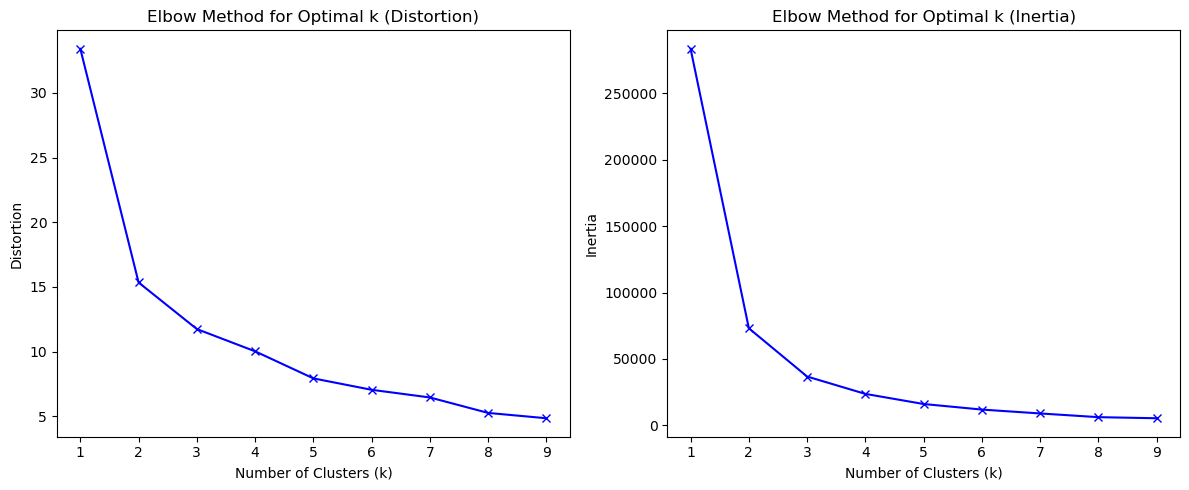

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot 1: Distortion
axs[0].plot(K, distortions, 'bx-')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Distortion')
axs[0].set_title('Elbow Method for Optimal k (Distortion)')

# Scatterplot 2: Inertia
axs[1].plot(K, inertias, 'bx-')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Inertia')
axs[1].set_title('Elbow Method for Optimal k (Inertia)')

plt.tight_layout()
plt.show()

Dapat dilihat setelah nilai k = 2, penurunan value distorsi dan inersia melandai. Maka dari itu disimpulkan bahwa nilai k optimal untuk klasterisasi ini adalah 2.

In [26]:
# Fit KMeans model for k=2
kmeans = KMeans(n_clusters=2, random_state=1)
df['cluster'] = kmeans.fit_predict(X)

In [27]:
print(df['cluster'])

0      0
1      1
2      1
3      0
4      1
      ..
162    1
163    1
164    1
165    0
166    0
Name: cluster, Length: 167, dtype: int32


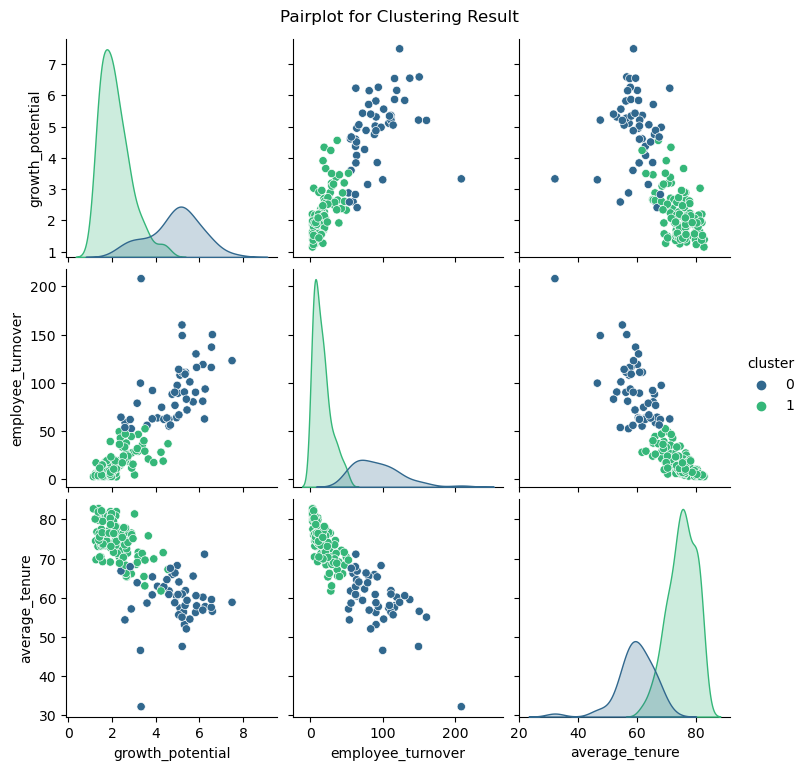

In [28]:
# Scatterplot matrix untuk menunjukkan cluster
sns.pairplot(df, hue='cluster', palette='viridis', vars=X)
plt.suptitle('Pairplot for Clustering Result', y=1.02)
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7008322936720994


In [30]:
cluster_1 = df[df['cluster'] == 0]
cluster_2 = df[df['cluster'] == 1]

In [31]:
cluster_1.size

588

In [32]:
cluster_2.size

1416

In [33]:
df.size

2004

In [34]:
columns = ['employee_turnover','revenue_growth','rd_investment','operational_cost','average_salary','average_tenure', 'growth_potential', 'net_profit']

pd.set_option('display.float_format', lambda x: '%.2f' % x)

mean_values_list = [] 

for col in columns:
    mean_cluster_1 = cluster_1[col].mean()
    mean_cluster_2 = cluster_2[col].mean()
    mean_values_list.append({'Column': col, 'Cluster 1': mean_cluster_1, 'Cluster 2': mean_cluster_2})

# Membuat DataFrame baru dari list
mean_values_df = pd.DataFrame(mean_values_list)

# Menampilkan DataFrame baru
mean_values_df

,Column,Cluster 1,Cluster 2
0,employee_turnover,92.19,15.88
1,revenue_growth,29.18,46.06
2,rd_investment,6.13,7.10
3,operational_cost,41.36,49.19
4,average_salary,3891.08,18069.32
5,average_tenure,59.50,75.15
6,growth_potential,4.87,2.15
7,net_profit,1890.41,7832.92


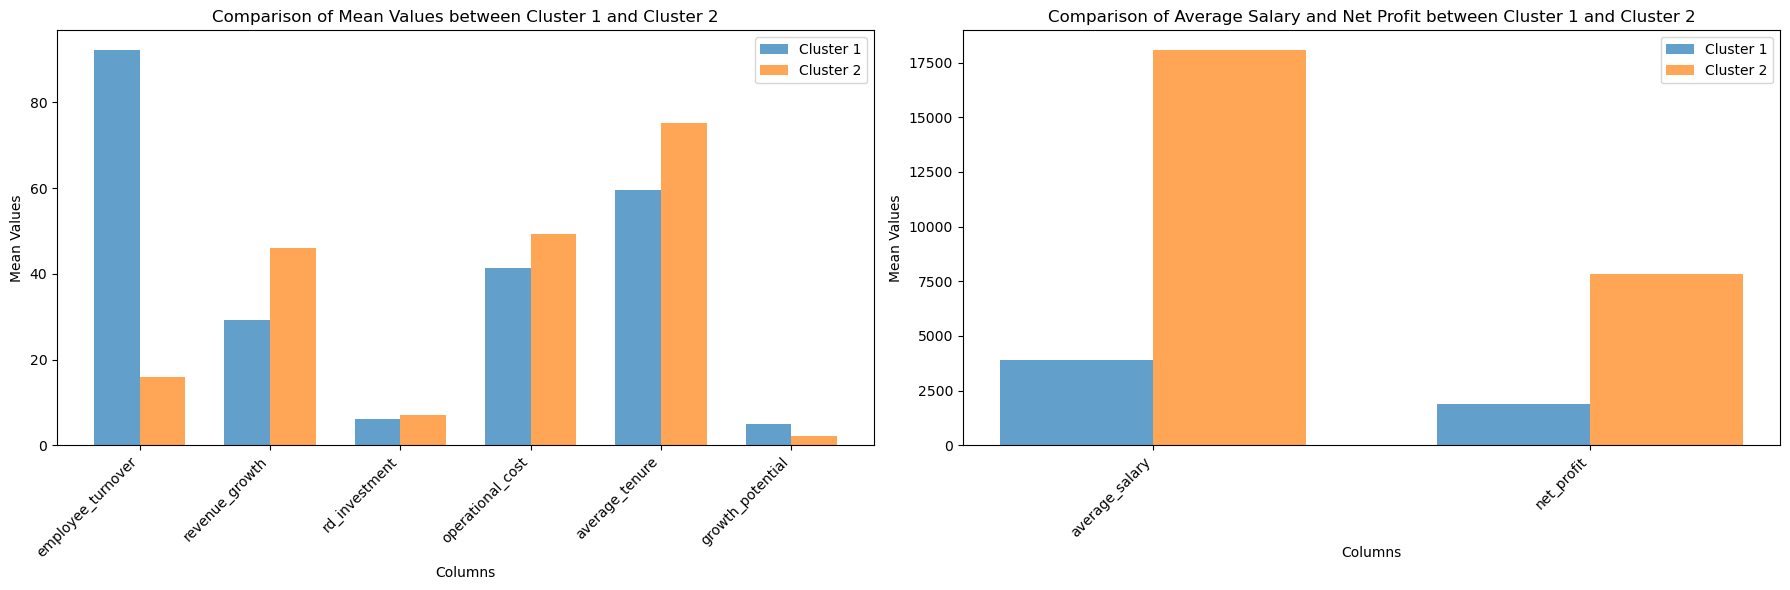

In [35]:
columns_to_compare = [col for col in columns if col not in ['average_salary', 'net_profit']]

mean_values_cluster_1 = mean_values_df[mean_values_df['Column'].isin(columns_to_compare)]['Cluster 1']
mean_values_cluster_2 = mean_values_df[mean_values_df['Column'].isin(columns_to_compare)]['Cluster 2']

bar_width = 0.35
bar_positions_1 = np.arange(len(columns_to_compare))
bar_positions_2 = bar_positions_1 + bar_width

plt.figure(figsize=(18, 6))  
ax1 = plt.subplot(1, 2, 1) 
ax1.bar(bar_positions_1, mean_values_cluster_1, width=bar_width, label='Cluster 1', alpha=0.7)
ax1.bar(bar_positions_2, mean_values_cluster_2, width=bar_width, label='Cluster 2', alpha=0.7)


ax1.set_xlabel('Columns')
ax1.set_ylabel('Mean Values')
ax1.set_title('Comparison of Mean Values between Cluster 1 and Cluster 2')
ax1.set_xticks(bar_positions_1 + bar_width / 2)
ax1.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax1.legend()


cls = [col for col in columns if col in ['average_salary', 'net_profit']]

cluster_1_salary = mean_values_df[mean_values_df['Column'].isin(cls)]['Cluster 1']
cluster_2_salary = mean_values_df[mean_values_df['Column'].isin(cls)]['Cluster 2']


bar_positions_1 = np.arange(len(cls))
bar_positions_2 = bar_positions_1 + bar_width

ax2 = plt.subplot(1, 2, 2) 
ax2.bar(bar_positions_1, cluster_1_salary, width=bar_width, label='Cluster 1', alpha=0.7)
ax2.bar(bar_positions_2, cluster_2_salary, width=bar_width, label='Cluster 2', alpha=0.7)


ax2.set_xlabel('Columns')
ax2.set_ylabel('Mean Values')
ax2.set_title('Comparison of Average Salary and Net Profit between Cluster 1 and Cluster 2')
ax2.set_xticks(bar_positions_1 + bar_width / 2)
ax2.set_xticklabels(cls, rotation=45, ha='right')
ax2.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

## Kesimpulan

Pada clusterisasi yang sudah saya buat, saya mengelompokkan perusahaan berdasarkan fitur revenue growth. Berikut adalah kesimpulan yang didapat:

- Perusahaan yang terdapat di cluster 2 memiliki revenue growth dan net profit yang lebih tinggi dibandingkan perusahaan yang terdapat di cluster 1.
- Perusahaan yang terdapat di cluster 2 memiliki employee turnover yang lebih rendah dan average tenure yang lebih tinggi dibandingkan perusahaan yang terdapat di cluster 1. Hal ini berarti perusahaan yang ada di cluster 2 dapat memberikan kepuasan kerja yang lebih baik dibandingkan perusahaan yang terdapat di cluster 1
- Perusahaan yang terdapat di cluster 2 memiliki operational cost, average salary, dan RD investment yang lebih tinggi dibandingkan perusahaan yang terdapat di cluster 1. Hal ini bisa jadi alasan kenapa growth potential yang dimiliki oleh perusahaan yang terdapat di cluster 2 lebih rendah dibandingkan perusahaan yang terdapat di cluster 1

##  Saran

- Perusahaan yang terdapat di cluster 1 bisa meningkatkan average salary bagi karyawan mereka, melihat average salary yang ada tidak sampai 50% dari perusahaan yang terdapat di cluster 2. Dapat dilihat pada grafik yang diberikan bahwa employee turnover yang dimiliki perusahaan di cluster 1 jauh diatas perusahaan di cluster 2, yang berarti kepuasan kerja yang diberikan masih jauh dari kata layak.
- Perusahaan yang terdapat di cluster 2 mungkin bisa sedikit menurunkan gaji karyawannya atau sedikit memangkas operational cost. Hal ini menyebabkan growth potential perusahaan yang terdapat di cluster 2 lebih kecil dibandingkan yang terdapat di cluster 1. Meskipun perusahaan yang terdapat di cluster 2 saat ini menunjukkan kinerja yang lebih baik, namun tidak memiliki prospek yang lebih bagus dalam jangka panjang dibandingkan dengan perusahaan yang ada di cluster 1